# Collection of p3_codes

## Table of contents
### 1. Analysis of Freeze Frame
&emsp;1.1 Export avi video file<BR>
    &emsp;&emsp;&emsp;&emsp;Video/Compress Image Files, using MJPEG Compressor.<BR>
&emsp;<a href='#rotate_compress_video'>1.2 Rotate and compress all videos in the current directory</a><BR>
&emsp;1.3 Analyze freezing using OpenCV GUI

---
# 1. Analyzing Synchronized freezing

## 1-0. Reading one CSV file

In [106]:
# importing csv module 
import csv 

# csv file name 
filename = "/home/wito/Dropbox/Jupyter/20190207_old_females_sync_freezing - female pair1.csv"

# initializing the titles and rows list 
fields1 = [] 
fields2 = [] 
rows = [] 

# reading csv file 
with open(filename, 'r') as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 

    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 

# extracting onset and offset of freezing
wS1 = []
wS2 = []

for i in range(2,len(rows)):
    if rows[i][0] == '':
        break
    wS1.append(int(rows[i][0]))
    wS1.append(int(rows[i][1]))

for i in range(2,len(rows)):
    if rows[i][3] == '':
        break
    wS2.append(int(rows[i][3]))
    wS2.append(int(rows[i][4]))

# convert to numpy array
import numpy as np
s1 = np.array(wS1)
s2 = np.array(wS2)


## 1-0. Reading all CSV files

.ipynb_checkpoints
20190207_old_females_sync_freezing - female pair1-Copy1.csv
Animal1 freeze : 59.583333
Animal2 freeze : 65.833333
Overlap freeze : 46.041667
f5_2.eps
20190207_old_females_sync_freezing - female pair1.csv
Animal1 freeze : 59.583333
Animal2 freeze : 65.833333
Overlap freeze : 46.041667


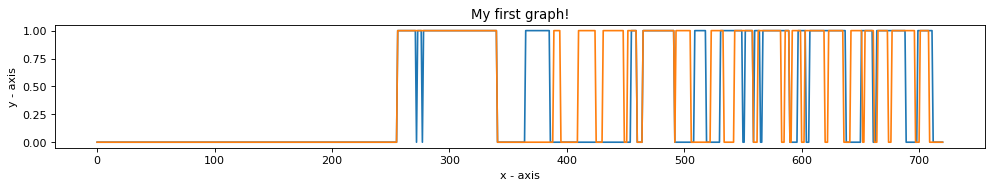

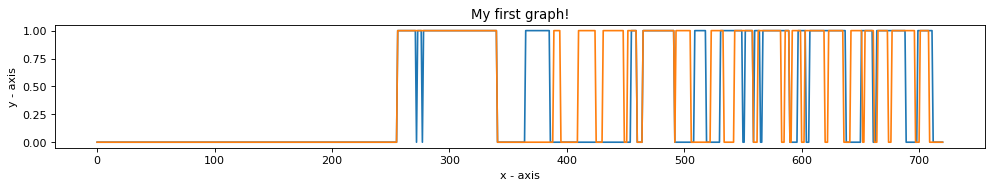

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import csv
import numpy as np

#############################################
# Get file names in the specified directory
path = os.getcwd()
path = '/home/wito/Dropbox/Jupyter/synch_freeze_data'
os.chdir(path)
os.listdir(path)

for file in os.listdir(path):
    print(file)
    base = os.path.splitext(file)[0]
    extn = os.path.splitext(file)[1]
    # print(base)
    # print(extn)
    if extn == '.csv':
        #print(base)
        #!ffmpeg -i {file} -vf "transpose=2,transpose=2" -vcodec libx264 {base}'.mp4'

        #############################################
        # For each csv file
        # Step1. Extract onset and offset frame number and create numpy arrays
        #############################################        
        # csv file name 
        filename = file

        # initializing the titles and rows list 
        fields1 = [] 
        fields2 = [] 
        rows = [] 

        # reading csv file 
        with open(filename, 'r') as csvfile: 
            # creating a csv reader object 
            csvreader = csv.reader(csvfile) 

            # extracting each data row one by one 
            for row in csvreader: 
                rows.append(row) 

        # extracting onset and offset of freezing
        wS1 = []
        wS2 = []

        for i in range(2,len(rows)):
            if rows[i][0] == '':
                break
            wS1.append(int(rows[i][0]))
            wS1.append(int(rows[i][1]))

        for i in range(2,len(rows)):
            if rows[i][3] == '':
                break
            wS2.append(int(rows[i][3]))
            wS2.append(int(rows[i][4]))

        # convert to numpy array

        s1 = np.array(wS1)
        s2 = np.array(wS2)

        #############################################
        # For each csv file
        # Step2. Extract onset and offset frame number and create numpy arrays
        #############################################
        # 2019/05/10
        #   Bug fix for wrong freezing percentage

        # The original videos at 4 frame per sec (0.25s/frame)
        # The duration is 3 min (1 min for acclimation and 2 min for CS)

        # Create 0 np.array of 2 columes and 721 rows
        #  representing two mice and 720 video frames (1 to 720 frame)
        column, row = 2, 721;
        overlap = np.array([[0 for x in range(column)] for y in range(row)])

        # Marking the overlap valiable as 1 when freeze for each animal
        # For animal#1 (s1), freezing positive frames are marked as 1 in the overlap valiable
        for i in range(0,int(len(s1)/2)):
            istart = 2*i         # s1[istart]: frame number for freezing starts
            iend = istart + 1    # s1[iend]:   frame number for freezing ends
            # print(istart)
            # print(iend)
            for j in range(s1[istart],s1[iend]+1):
                overlap[j][0] = 1

        # For animal#2 (s2), freezing positive frames are marked as 1 in the overlap valiable
        for i in range(0,int(len(s2)/2)):
            istart = 2*i
            iend = istart + 1
            # print(istart)
            # print(iend)
            for j in range(s2[istart],s2[iend]+1):
                overlap[j][1] = 1

        # Scan the overlap valiable for freezing in animal#1 (count1), animal#2 (count2)
        # and overlapped freezing (count3)
        count1 = 0
        count2 = 0
        count3 = 0

        for i in range(241,int(len(overlap))):        
            if overlap[i,0] == 1:
                count1 = count1 + 1
            if overlap[i,1] == 1:
                count2 = count2 + 1
            if overlap[i,0] == 1 and overlap[i,1] == 1:
                count3 = count3 + 1

        print("Animal1 freeze : %f" % (count1/480.0*100.0))
        print("Animal2 freeze : %f" % (count2/480.0*100.0))
        print("Overlap freeze : %f" % (count3/480.0*100.0))


        # Plotting the freezing dynamics
        fig = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
        fig.subplots_adjust(top=0.8)

        ax1 = fig.add_subplot(211)
        x = overlap[:,0]
        y = overlap[:,1]
        ax1.plot(x) 
        ax1.plot(y)  

        ax1.set_xlabel('x - axis')  
        ax1.set_ylabel('y - axis') 
        ax1.set_title('My first graph!')      
        plt.savefig('f5_2.eps', format='eps', dpi=1000)


## 1-1. Entries of Freezing Dynamics
After the video analysis, enter the starting and ending video frame number for each freezing bout. 

In [1]:
# F1

import numpy as np

s1 = np.array([
256,271,
273,276,
278,340,
365,385,
455,459,
465,491,
509,518,
531,549,
552,558,
560,564,
567,589,
597,603,
607,637,
651,660,
664,688,
699,711
])

s2 = np.array([
256,340,
389,394,
410,424,
431,448,
452,459,
465,491,
493,505,
523,533,
543,558,
563,582,
586,589,
592,599,
603,619,
623,635,
642,651,
654,661,
665,673,
677,696,
701,708
])

In [67]:
# F2_1
import numpy as np

s1 = np.array([
259,266,
275,348,
388,396,
408,428,
434,446,
476,483,
487,505,
508,513,
526,545,
555,574,
586,593,
600,660,
688,692,
696,720
])

s2 = np.array([
245,253,
327,338,
340,360,
409,423,
425,431,
451,457,
460,463,
468,492,
494,504,
508,524,
534,548,
555,571,
600,611,
615,624,
628,640,
644,666,
670,688,
696,720
])

In [60]:
# F2_2
import numpy as np

s1 = np.array([
240,253,
281,291,
337,360,
366,371,
385,393,
395,437,
445,451,
456,480,
484,493,
497,515,
521,532,
547,555,
599,627,
639,681
])

s2 = np.array([
334,368,
381,392,
395,404,
410,417,
427,437,
441,450,
453,459,
464,471,
474,479,
483,493,
497,515,
529,541,
551,567,
594,603,
606,613,
617,624,
628,646,
651,683,
693,700
])

In [63]:
# F3_1
import numpy as np

s1 = np.array([
247,261,
277,291,
318,361,
378,423,
449,455,
463,499,
523,558,
584,693,
702,720
])

s2 = np.array([
280,298,
319,361,
385,425,
438,453,
474,506,
520,556,
560,564,
597,626,
628,699,
704,720
])

In [65]:
# F3_2
import numpy as np

s1 = np.array([
261,284,
295,303,
381,481,
498,651,
665,708
])

s2 = np.array([
258,265,
267,273,
275,285,
307,356,
377,388,
396,426,
436,484,
500,511,
513,557,
566,615,
618,623,
625,651,
660,720
])

In [67]:
# F4_1
import numpy as np

s1 = np.array([
250,256,
317,388,
399,422,
426,463,
489,506,
512,620,
639,676,
680,720
])

s2 = np.array([
261,272,
331,338,
347,364,
388,398,
410,531,
569,621,
661,720
])

In [69]:
# F4_2
import numpy as np

s1 = np.array([
261,277,
308,326,
334,377,
382,452,
465,557,
575,720
])

s2 = np.array([
305,318,
338,374,
428,465,
483,491,
532,541,
557,653,
688,711,
713,720
])

In [71]:
# F5_1
import numpy as np

s1 = np.array([
248,258,
267,332,
392,632,
648,679,
683,720
])

s2 = np.array([
259,345,
362,379,
402,550,
578,720
])

In [1]:
# F5_2
import numpy as np

s1 = np.array([
240,254,
308,376,
396,451,
452,509,
531,594,
603,661,
676,720
])

s2 = np.array([
246,253,
315,324,
332,367,
394,506,
531,582,
606,650,
684,691,
702,718
])

## 1-2. Recalculate the percentage of freezing and plot freezing dynamics 

Animal1 freeze : 76.041667
Animal2 freeze : 60.208333
Overlap freeze : 59.791667


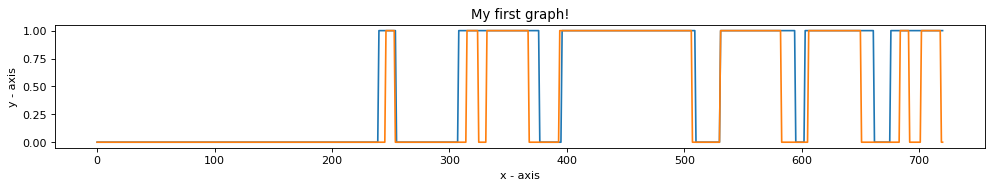

In [3]:
# 2019/05/10
#   Bug fix for wrong freezing percentage

# The original videos at 4 frame per sec (0.25s/frame)
# The duration is 3 min (1 min for acclimation and 2 min for CS)

# Create 0 np.array of 2 columes and 721 rows
#  representing two mice and 720 video frames (1 to 720 frame)
column, row = 2, 721;
overlap = np.array([[0 for x in range(column)] for y in range(row)])

# Marking the overlap valiable as 1 when freeze for each animal
# For animal#1 (s1), freezing positive frames are marked as 1 in the overlap valiable
for i in range(0,int(len(s1)/2)):
    istart = 2*i         # s1[istart]: frame number for freezing starts
    iend = istart + 1    # s1[iend]:   frame number for freezing ends
    # print(istart)
    # print(iend)
    for j in range(s1[istart],s1[iend]+1):
        overlap[j][0] = 1

# For animal#2 (s2), freezing positive frames are marked as 1 in the overlap valiable
for i in range(0,int(len(s2)/2)):
    istart = 2*i
    iend = istart + 1
    # print(istart)
    # print(iend)
    for j in range(s2[istart],s2[iend]+1):
        overlap[j][1] = 1

# Scan the overlap valiable for freezing in animal#1 (count1), animal#2 (count2)
# and overlapped freezing (count3)
count1 = 0
count2 = 0
count3 = 0

for i in range(241,int(len(overlap))):        
    if overlap[i,0] == 1:
        count1 = count1 + 1
    if overlap[i,1] == 1:
        count2 = count2 + 1
    if overlap[i,0] == 1 and overlap[i,1] == 1:
        count3 = count3 + 1

print("Animal1 freeze : %f" % (count1/480.0*100.0))
print("Animal2 freeze : %f" % (count2/480.0*100.0))
print("Overlap freeze : %f" % (count3/480.0*100.0))


# Plotting the freezing dynamics
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(211)
x = overlap[:,0]
y = overlap[:,1]
ax1.plot(x) 
ax1.plot(y)  

ax1.set_xlabel('x - axis')  
ax1.set_ylabel('y - axis') 
ax1.set_title('My first graph!')      
plt.savefig('f5_2.eps', format='eps', dpi=1000)

## 1-3. Test the significance of overlapped freezing by permutation
1. Calculate overlapped freezing by permutating relative freezing dynamics between the two animals. <br>
    1K sampling of % overlapped freezing from the permutation will be stored as "test1.csv".
2. One-Sample Wilcoxon Signed Rank Test in R using the "r-codes" notebook.<br>
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r

In [4]:
# Permutation between two freezing dynamics during tone and print out the overlapped freezing
# Repeat the procedure 1000 times.

import random

# Extract freezing pattern during tone
a = overlap[240:720,:]

# Repeat random shift between the two 1K times 
nRepeat = 1000
output = np.array([0.0 for x in range(nRepeat)])
for x in range(nRepeat):
    # Generate random number ranged from 0 to 480
    shift = random.randint(0,480)
    # Shift the freezing pattern from animal#1
    a[:,0] = np.roll(a[:,0],shift)

    # Count the freezing frames for animal#1 (count1), animal#2 (count2) and overlap (count3)
    count1 = 0
    count2 = 0
    count3 = 0
    for i in range(0,int(len(a))):        
        if a[i,0] == 1:
            count1 = count1 + 1
        if a[i,1] == 1:
            count2 = count2 + 1
        if a[i,0] == 1 and a[i,1] == 1:
            count3 = count3 + 1

    # print("Animal1 freeze : %f" % (count1/480.0*100.0))
    # print("Animal2 freeze : %f" % (count2/480.0*100.0))
    # print("Overlap freeze : %f" % (count3/480.0*100.0))

    # print("%f, %f, %f" % (count1/480.0*100.0),(count2/480.0*100.0),(count3/480.0*100.0))
    # print(shift,(count1/480.0*100.0),(count2/480.0*100.0),(count3/480.0*100.0),sep=",")
    
    # The overlapped freezing
    print(count3/480.0*100.0)
    output[x] = count3/480.0*100.0

# output csv files
import csv

# one row and multiple columns
# with open('test.csv', mode='w') as test_file:
#     test_writer = csv.writer(test_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     test_writer.writerow((output[x] for x in range(0,len(output))))

# one columns and multiple rows
with open('test1.csv', mode='w') as test1_file:
    test1_writer = csv.writer(test1_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for word in output:
        test1_writer.writerow([word])


44.375
43.958333333333336
43.333333333333336
46.041666666666664
47.083333333333336
46.666666666666664
45.416666666666664
41.875
50.208333333333336
50.416666666666664
43.333333333333336
45.83333333333333
43.541666666666664
43.75
41.66666666666667
41.25
45.416666666666664
43.125
42.70833333333333
43.125
43.125
40.416666666666664
42.291666666666664
45.208333333333336
48.333333333333336
45.208333333333336
44.79166666666667
43.75
45.208333333333336
41.66666666666667
46.25
45.625
42.083333333333336
51.24999999999999
42.70833333333333
40.625
46.041666666666664
44.166666666666664
52.29166666666667
46.041666666666664
43.125
40.416666666666664
46.458333333333336
45.208333333333336
48.75
46.25
41.458333333333336
45.0
46.25
45.208333333333336
41.041666666666664
42.083333333333336
44.583333333333336
43.541666666666664
47.5
41.25
47.291666666666664
46.666666666666664
46.458333333333336
43.75
43.125
45.625
46.041666666666664
40.625
42.5
45.416666666666664
44.79166666666667
44.79166666666667
40.625
46

## 4. Computre the distribution of lag-time for onset and offset freezing

In [65]:
def lagtime(w1, w2, onOrOff):
    # Compute lagtimes w1 -> w2
    # onOrOff: Select either 0 (onset) or 1 (offset).

    # Number of freezing epochs are half of the length of 'w1'
    w = int(len(w1)/2)
    
    # "iCloseEpoch" stores indices of the closest freezing epoch from partner mouse
    iCloseEpoch = np.array([0 for x in range(w)]) 
    # "lagTime" stores the lag-time in frame number
    lagTime = np.array([0 for x in range(w)])


    # Search the closest freezing epoch in the partner mouse
    for i in range(0,int(len(w1)/2)):
        istart = 2*i + onOrOff
        wLagtime = 10000
        wiCloseEpoch = 0

        for j in range(0,int(len(w2)/2)):    
            jstart = 2*j + onOrOff    
            diff = w1[istart] - w2[jstart]
            if abs(wLagtime) > abs(diff) :
                wLagtime = diff
                wiCloseEpoch = j

        iCloseEpoch[i] = wiCloseEpoch
        lagTime[i] = wLagtime
    
    # Printout the results
    
    print("#1 freeze epoch ", *range(w), sep = ", ")
    
    iw1 = [x*2+onOrOff for x in range(0,int(len(w1)/2))]    
    print("#1 frame number ", *w1[iw1], sep = ", ")

    iw2 = [x*2+onOrOff for x in iCloseEpoch]
    print("#2 frame number ", *w2[iw2], sep = ", ")    

    print("#2 freeze epoch ", *iCloseEpoch, sep = ", ")
    print("lag-time        ", *lagTime, sep = ", ")
    print()

    
# Main process for calculation

print("Freezing onset from s1 mouse to s2")
lagtime(s1,s2,0) # Freezing onset from s1 mouse to s2 

print("Freezing onset from s2 mouse to s1")
lagtime(s2,s1,0) # Freezing onset from s2 mouse to s1

print("Freezing offset from s1 mouse to s2")
lagtime(s1,s2,1) # Freezing offset from s1 mouse to s2

print("Freezing offset from s2 mouse to s1")
lagtime(s2,s1,1) # Freezing onset from s2 mouse to s1



Freezing onset from s1 mouse to s2
#1 freeze epoch , 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
#1 frame number , 256, 273, 278, 365, 455, 465, 509, 531, 552, 560, 567, 597, 607, 651, 664, 699
#2 frame number , 256, 256, 256, 389, 452, 465, 523, 523, 543, 563, 563, 592, 603, 654, 665, 701
#2 freeze epoch , 0, 0, 0, 1, 4, 5, 7, 7, 8, 9, 9, 11, 12, 15, 16, 18
lag-time        , 0, 17, 22, -24, 3, 0, -14, 8, 9, -3, 4, 5, 4, -3, -1, -2

Freezing onset from s2 mouse to s1
#1 freeze epoch , 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18
#1 frame number , 256, 389, 410, 431, 452, 465, 493, 523, 543, 563, 586, 592, 603, 623, 642, 654, 665, 677, 701
#2 frame number , 256, 365, 365, 455, 455, 465, 509, 531, 552, 560, 597, 597, 607, 607, 651, 651, 664, 664, 699
#2 freeze epoch , 0, 3, 3, 4, 4, 5, 6, 7, 8, 9, 11, 11, 12, 12, 13, 13, 14, 14, 15
lag-time        , 0, 24, 45, -24, -3, 0, -16, -8, -9, 3, -11, -5, -4, 16, -9, 3, 1, 13, 2

Freezing offset from s1 mouse to s2
#1

---
## Random number generation

In [88]:
import random
for x in range(10):
  print(random.randint(0,480))

162
399
153
233
88
451
51
243
39
370


## Plot and save figure

<Figure size 432x288 with 0 Axes>

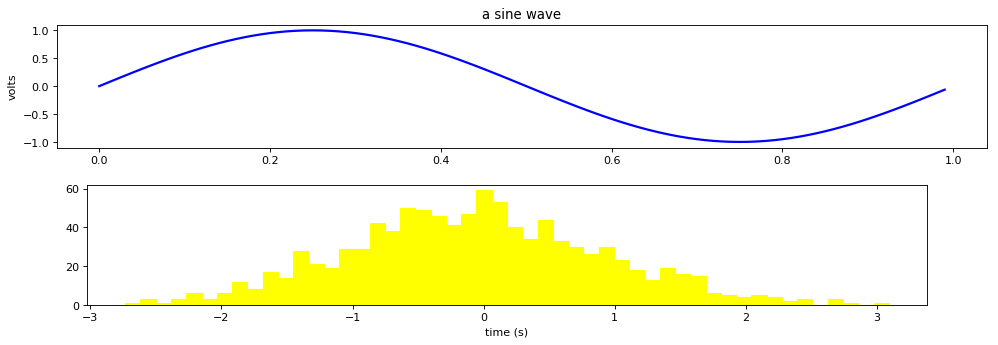

In [68]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50, facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.savefig('test.eps', format='eps', dpi=1000)

In [61]:
cd ~/

/home/wito


## Another plot

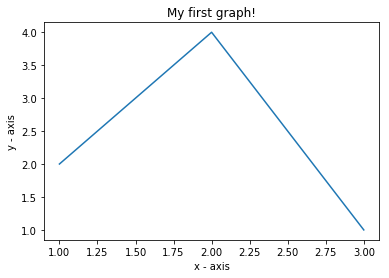

In [38]:


%matplotlib inline

# importing the required module 
import matplotlib.pyplot as plt 



# x axis values 
x = [1,2,3] 
# corresponding y axis values 
y = [2,4,1] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.show() 

In [ ]:
import os

print "Enter the location of the files: "; directory = raw_input()

path = r"%s" % directory

for file in os.listdir(path):
    current_file = os.path.join(path, file)

    data = open(current_file, "rb")
    
# Here's an abridged version of the data analysis

    for i in range(0, 10):
        fluff = data.readline()

    Input_Parameters = fluff.split("\t")

    output.write("%f\t%f\t%f\t%f\t%.3f\t%.1f\t%.2f\t%.2f\t%s\n" % (Voc, Isc, Vmp, Imp, Pmax, 100 * Eff, IscErr, 100 * (1 - (P2 / Pmax)), file))
    data.close()


---
<a id='rotate_compress_video'></a>
### Rotate and compress all videos in the current directory

In [ ]:
import os

path = os.getcwd()

path = '/home/wito/ubg-tera05/WD_Passport/2016-02-27_OFC_female_CNO/avi1'
os.chdir(path)

os.listdir(path)

for file in os.listdir(path):
    print(file)
    base = os.path.splitext(file)[0]
    print(base)
    !ffmpeg -i {file} -vf "transpose=2,transpose=2" -vcodec libx264 {base}'.mp4'

F28b_sal.avi
F28b_sal
ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 

### Rotate and compress all avi videos in the current directory

In [1]:
import os

path = os.getcwd()

path = '/home/wito/ubg-tera05/WD_Passport/Alexei/synchrony/cohort3_022519_males_test1_together'

os.chdir(path)
os.listdir(path)

for file in os.listdir(path):
    print(file)
    base = os.path.splitext(file)[0]
    extn = os.path.splitext(file)[1]
    # print(base)
    # print(extn)
    if extn == '.avi':
        print(base)
        !ffmpeg -i {file} -vf "transpose=2,transpose=2" -vcodec libx264 {base}'.mp4'

022519 pairs test.ffdd
022519 pairs test.fftt
1.avi
1
ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --

### Rotate and compress all videos recurrently underling subdirectories

In [5]:
import os

path1 = os.getcwd()
path1 = '/home/wito/ubg-tera05/WD_Passport'
path1 = '/home/wito/ubg-tera05/WD_Passport/Alexei/synchrony'

for file in os.listdir(path1):
    path2 = os.path.join(path1, file)

    for file in os.listdir(path2):
        if file == 'avi':
            path3 = path2 + '/avi'
            os.chdir(path3)
            
            for file in os.listdir(path3):
                base = os.path.splitext(file)[0]
                print(path3 + file)
                print(path3 + base)
                
                !ffmpeg -i {file} -vf "transpose=2,transpose=2" -vcodec libx264 {base}'.mp4'

### Copy all files in the current directory with name with 'copy' at the end

In [3]:
import os
from shutil import copyfile

# get current directory
path = os.getcwd()
# change to the directory
path = '/home/wito/ubg-tera05/WD_Passport/2016-02-27_OFC_female_CNO/avi1'
os.chdir(path)
# list the directory
os.listdir(path)
    
for file in os.listdir(path):
    base = os.path.splitext(file)[0]    
    copyfile(file, file + 'copy')

### List current directory

In [7]:
#!/usr/bin/env python
from __future__ import print_function
import os
 
path = '.'
 
files = os.listdir(path)
for name in files:
    print(name)

020619
020719 together


### Command to list any directory
Add argument for the target directory

In [21]:
#!/usr/bin/env python
from __future__ import print_function
import os,sys
 
path = '.'
print(sys.argv)

if len(sys.argv) == 2:
    path = sys.argv[1]

files = os.listdir(path)
for name in files:
    print(name)

['/home/wito/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py', '-f', '/run/user/1000/jupyter/kernel-3a03cfe0-da46-4470-ac1d-9988d1b821ca.json']
F28b_sal.avi
F28b_sal.avicopy
F29_CNO.avi
F29_CNO.avicopy
F30a_sal.avi
F30a_sal.avicopy
F30b_cno.avi
F30b_cno.avicopy
F31a_sal.avi
F31a_sal.avicopy
F31b_cno.avi
F31b_cno.avicopy
F32a_sal.avi
F32a_sal.avicopy
F32b_cno.avi
F32b_cno.avicopy
F33a_sal.avi
F33a_sal.avicopy
F33b_cno.avi
F33b_cno.avicopy
F34a_sal.avi
F34a_sal.avicopy
F34b_cno.avi
F34b_cno.avicopy
F35a_sal.avi
F35a_sal.avicopy
F35b_cno.avi
F35b_cno.avicopy
test.mp4
test.mp4copy


### Extract file name and extention

In [13]:
file = '/home/wito/ubg-tera05/WD_Passport/2016-02-27_OFC_female_CNO/avi1/test.py'
print(os.path.split(file))
print(os.path.basename(file))
print(os.path.splitext(file))

('/home/wito/ubg-tera05/WD_Passport/2016-02-27_OFC_female_CNO/avi1', 'test.py')
test.py
('/home/wito/ubg-tera05/WD_Passport/2016-02-27_OFC_female_CNO/avi1/test', '.py')


In [ ]:
import os

print "Enter the location of the files: "; directory = raw_input()

path = r"%s" % directory

for file in os.listdir(path):
    current_file = os.path.join(path, file)

    data = open(current_file, "rb")

    
    
    
# Here's an abridged version of the data analysis

    for i in range(0, 10):
        fluff = data.readline()

    Input_Parameters = fluff.split("\t")

    output.write("%f\t%f\t%f\t%f\t%.3f\t%.1f\t%.2f\t%.2f\t%s\n" % (Voc, Isc, Vmp, Imp, Pmax, 100 * Eff, IscErr, 100 * (1 - (P2 / Pmax)), file))
    data.close()


# Date and time

In [7]:
import datetime
now = datetime.datetime.now()
print("Current date and time (GMT): ",str(now))
print(now.isoformat())

Current date and time (GMT):  2019-01-04 18:44:25.167641
2019-01-04T18:44:25.167641


# Executing Shell Commands with "!" in Jupyter

For path with spaces, need to use the double quotes

In [3]:
cd /home/wito/ubg-tera05/00\ Behaviors/00\ Attachment2

[WinError 3] The system cannot find the path specified: '/home/wito/ubg-tera05/00\\ Behaviors/00\\ Attachment2'
C:\Users\User\Dropbox\Jupyter


In [2]:
!ls "$(pwd)"

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import os
test = os.getcwd() # In case the path in question is your current directory
print(repr(test))
os.listdir(test)

'C:\\Users\\User\\Dropbox\\Jupyter'


['.ipynb_checkpoints',
 '1_p3_DataProcessPipeline_110518.ipynb',
 '2_m_PACdataProcess_121118-work.ipynb',
 'alexei',
 'Bioconductor',
 'desktop.ini',
 'dlc2',
 'DLC2_docker_local',
 'DLC2_OF',
 'DLC2_on_GCP_2019-01-11',
 'ezTrack',
 'f5_2.eps',
 'figure',
 'freeze.csv',
 'GCP operation.ipynb',
 'Jupyter_shortcut_keys.ipynb',
 'MATLAB',
 'messi5.jpg',
 'm_codes.ipynb',
 'm_gaussian_filter.ipynb',
 'm_matlab_kernel.ipynb',
 'old codes',
 'opencv',
 'opencv_install.ipynb',
 'p3_codes.ipynb',
 'p3_container_management.ipynb',
 'p3_MathExpression.ipynb',
 'p3_matlab_engine_python.ipynb',
 'p3_smoothing.ipynb',
 'python-in-neuroscience-tutorials-0.1.2',
 'R',
 'r_codes.ipynb',
 'synchro_freeze',
 'synch_freeze_data',
 'test1.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'whatever.eps']

## Passing variable to shell command

In [57]:
import os

path = os.getcwd()

for file in os.listdir(os.getcwd()):
    current_file = os.path.join(path, file)
    print(current_file)
    !ls "{current_file}"


/home/wito/ubg-tera05/00 Behaviors/00 Attachment2/2018-10-14_female_3b_3camera_usv
Camera_1.seq  filenumber.txt		T2018-10-14_17-31-14.wav
Camera_2.seq  FILES.LOG			T2018-10-14_18-31-15.wav
Camera_3.seq  T2018-10-14_15-31-15.wav
Camera_4.seq  T2018-10-14_16-31-15.wav
/home/wito/ubg-tera05/00 Behaviors/00 Attachment2/2018-10-14_female_4b_3camera_usv
Camera_1.seq  filenumber.txt		T2018-10-14_21-28-59.wav
Camera_2.seq  FILES.LOG			T2018-10-14_22-28-58.wav
Camera_3.seq  T2018-10-14_19-28-59.wav
Camera_4.seq  T2018-10-14_20-28-59.wav


# Python - Strings
https://www.tutorialspoint.com/python/python_strings.htm

In [6]:
print("%s" % 'test data')
print("%d" % 10)
print("%r" % 'test data')

test data
10
'test data'


In [7]:
x = "There are %d types of people." % 10
print("I said: %r." % x)

I said: 'There are 10 types of people.'.


# Convert sec to HH:MM:SS

In [2]:
sec = 11309.007000
import time
time.strftime('%H:%M:%S', time.gmtime(sec))


'03:08:29'

# Convert HH:MM:SS to sec

In [41]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


In [52]:
start = get_sec('00:06:37')
stop = get_sec('01:41:37')
total = get_sec('03:09:06')

print(start,stop,total)

print("start = ", str(start/total))
print("stop = ", str(stop/total))

397 6097 11346
start =  0.034990304953287504
stop =  0.5373699982372643
